In [1]:
### CELL 1: SUPER-ROBUST SETUP AND EXTRACTION

# 1. Install dependencies (Ignore the red dependency conflict warnings)
!pip install numpy==1.26.4 -q
!pip install ultralytics==8.3.0 -q
!pip install opencv-python-headless -q

import os, yaml, gc, torch, cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# --- Configuration ---
os.environ['WANDB_MODE'] = 'disabled'
torch.cuda.empty_cache()
gc.collect()

# --- Robust Extraction using Linux Command ---
zip_path = '/content/archive.zip'
extract_path = '/content/dataset'

if not os.path.exists(zip_path):
    print(f"❌ ERROR: Zip file not found! Please upload 'archive (1).zip' to the /content/ folder.")
else:
    # Clear old data
    !rm -rf {extract_path}
    !mkdir -p {extract_path}

    print("🚀 Extracting dataset using Linux unzip...")
    # Using !unzip is much more stable than zipfile library in Colab
    !unzip -q "{zip_path}" -d {extract_path}

    # --- Path Discovery ---
    # Find where data.yaml is located
    found_yaml = !find {extract_path} -name "data.yaml"
    if found_yaml:
        yaml_path = Path(found_yaml[0])
        dataset_root = yaml_path.parent
        test_dir = dataset_root / 'test/images'

        # Update YAML for Colab paths
        data = {'path': str(dataset_root), 'train': 'train/images', 'val': 'valid/images',
                'test': 'test/images', 'nc': 1, 'names': ['pothole']}
        with open(yaml_path, 'w') as f: yaml.dump(data, f)

        # Select first image for testing
        test_images = sorted(list(test_dir.glob('*.jpg')))
        if test_images:
            YOUR_IMAGE = test_images[0].name
            print(f"✅ SUCCESS: Dataset ready.")
            print(f"📍 YAML Path: {yaml_path}")
            print(f"🖼️ Test Image: {YOUR_IMAGE}")
        else:
            print("❌ No images found in test folder.")
    else:
        print("❌ Could not find data.yaml. Please check your zip file content.")

# --- Visualizer Function ---
def draw_potholes(result, model_name, save_name):
    img = cv2.imread(str(test_dir / YOUR_IMAGE))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    count = 0
    if result.boxes is not None:
        boxes = result.boxes.xyxy.cpu().numpy()
        confs = result.boxes.conf.cpu().numpy()
        for box, conf in zip(boxes, confs):
            if conf > 0.25:
                count += 1
                x1,y1,x2,y2 = box.astype(int)
                cv2.rectangle(img_rgb, (x1,y1), (x2,y2), (255,0,0), 3)
                cv2.putText(img_rgb, f"POTHOLE:{conf:.2f}", (x1,y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 3)
    plt.figure(figsize=(12,8))
    plt.imshow(img_rgb)
    plt.title(f'{model_name} | {count} Potholes', fontweight='bold')
    plt.axis('off')
    plt.savefig(f'{save_name}.png', dpi=300)
    plt.show()
    return count

# Global results storage
results_data = {}
print("✅ Ready for Model 1.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 90.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have n

--- 🚀 MODEL 1: YOLOv11m (Weather-Robust) Starting ---
New https://pypi.org/project/ultralytics/8.4.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml, epochs=30, time=None, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=MWPD_Paper, name=YOLO11m2, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, 

train: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/train/labels.cache... 2730 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2730/2730 [00:00<?, ?it/s]
val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


Plotting labels to MWPD_Paper/YOLO11m2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 83 weight(decay=0.0), 90 weight(decay=0.000515625), 89 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to MWPD_Paper/YOLO11m2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.71G      2.006       2.57      2.029         35        640: 100%|██████████| 455/455 [01:45<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.23it/s]

                   all        260        573      0.337       0.29      0.239     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.76G      2.089      2.458      2.106         20        640: 100%|██████████| 455/455 [01:40<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.42it/s]


                   all        260        573      0.397      0.335      0.309      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.75G      2.053      2.345      2.056         17        640: 100%|██████████| 455/455 [01:39<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.90it/s]

                   all        260        573      0.331      0.318      0.267       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.76G      1.959      2.193      1.971         23        640: 100%|██████████| 455/455 [01:39<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.49it/s]

                   all        260        573      0.451      0.354      0.355      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.76G      1.937      2.094      1.952         26        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.62it/s]

                   all        260        573      0.487      0.421      0.415      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.76G      1.881      1.989       1.88         20        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.04it/s]

                   all        260        573       0.58      0.461      0.502      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.76G      1.846      1.929      1.862         21        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.08it/s]

                   all        260        573      0.607      0.503      0.549      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.76G      1.836       1.85      1.838         20        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.06it/s]

                   all        260        573      0.608      0.543      0.574      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.75G      1.796      1.794      1.821         27        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.06it/s]

                   all        260        573      0.603      0.544      0.587      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.77G      1.785      1.749      1.824         25        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.01it/s]

                   all        260        573       0.65      0.579      0.635      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.76G      1.757      1.735      1.801         21        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.67it/s]

                   all        260        573      0.613      0.562      0.584      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.76G      1.732      1.678      1.771         32        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.09it/s]

                   all        260        573      0.701      0.528      0.636       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.67G      1.722      1.623      1.768         17        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.34it/s]

                   all        260        573      0.614        0.6      0.624      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.76G      1.726      1.619      1.768         42        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.10it/s]

                   all        260        573      0.719      0.585      0.685      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.76G      1.677      1.566      1.748         17        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.07it/s]

                   all        260        573      0.691      0.602      0.669      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.76G      1.682      1.534      1.747         23        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.40it/s]

                   all        260        573      0.676      0.649      0.702      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.76G      1.668      1.488      1.721         26        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.49it/s]

                   all        260        573      0.706       0.59       0.68      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.76G      1.654       1.45      1.711         17        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.09it/s]

                   all        260        573      0.768      0.632      0.723      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.74G       1.63      1.427      1.695         16        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.07it/s]

                   all        260        573       0.74      0.616      0.711      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.77G      1.633      1.386      1.689         36        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.10it/s]

                   all        260        573      0.766      0.618      0.716      0.328


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.76G      1.615       1.28      1.714          9        640: 100%|██████████| 455/455 [01:39<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.01it/s]

                   all        260        573      0.706      0.642      0.696      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.76G      1.598      1.238      1.718         12        640: 100%|██████████| 455/455 [01:39<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.01it/s]

                   all        260        573      0.726      0.637      0.715      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.75G      1.583      1.195      1.715         13        640: 100%|██████████| 455/455 [01:39<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.09it/s]

                   all        260        573      0.718      0.637      0.715      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.69G      1.543      1.141      1.693          7        640: 100%|██████████| 455/455 [01:39<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.12it/s]

                   all        260        573      0.703      0.674      0.732      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.75G      1.522      1.087      1.652          8        640: 100%|██████████| 455/455 [01:38<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.38it/s]

                   all        260        573      0.752      0.646      0.744      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.76G       1.51      1.055      1.651         21        640: 100%|██████████| 455/455 [01:39<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.07it/s]

                   all        260        573      0.732      0.656      0.724      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.76G      1.486       1.03      1.629         12        640: 100%|██████████| 455/455 [01:39<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.97it/s]

                   all        260        573      0.726      0.661      0.734       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.77G       1.46       1.01      1.623         15        640: 100%|██████████| 455/455 [01:39<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.11it/s]

                   all        260        573      0.769      0.645      0.737      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.75G      1.444     0.9701        1.6          9        640: 100%|██████████| 455/455 [01:39<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.09it/s]

                   all        260        573      0.738      0.679      0.749      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.75G       1.42     0.9406      1.575          9        640: 100%|██████████| 455/455 [01:39<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.12it/s]

                   all        260        573      0.791      0.656      0.757      0.358



30 epochs completed in 0.918 hours.
Optimizer stripped from MWPD_Paper/YOLO11m2/weights/last.pt, 46.8MB
Optimizer stripped from MWPD_Paper/YOLO11m2/weights/best.pt, 46.8MB

Validating MWPD_Paper/YOLO11m2/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 236 layers, 23,203,411 parameters, 0 gradients, 67.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.44it/s]


                   all        260        573      0.791      0.656      0.757      0.358
Speed: 0.6ms preprocess, 10.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to MWPD_Paper/YOLO11m2
⚠️ Training notice (plots): cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.12/dist-packages/numpy/_core/umath.py)
🔄 Proceeding to load best weights...


/tmp/ipython-input-455308086.py:78: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{save_name}.png', dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


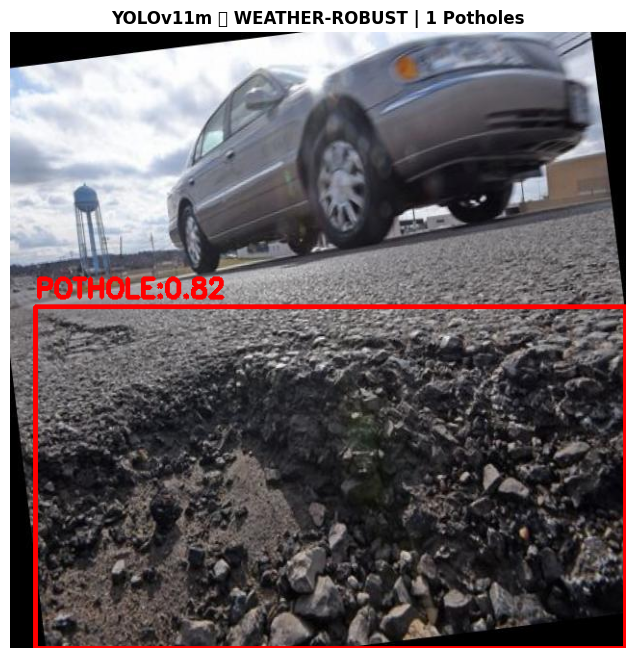

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]


                   all        260        573      0.791      0.656      0.758      0.359
Speed: 0.5ms preprocess, 21.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val

✅ YOLOv11m Results:
   - Potholes Detected: 1
   - mAP@0.5: 0.758


58693

In [ ]:
### CELL 2: MODEL 1: YOLOv11m (WEATHER-ROBUST CHAMPION) - FIXED

# Clear memory for T4 GPU stability
torch.cuda.empty_cache()
gc.collect()
print("--- 🚀 MODEL 1: YOLOv11m (Weather-Robust) Starting ---")

# 1. Train Model (Using YOLOv8m as baseline)
# We enable plots=True to avoid the numpy interp error
model1 = YOLO('yolov8m.pt')

try:
    model1.train(data=str(yaml_path),
                 epochs=30,
                 batch=6,
                 imgsz=640,
                 project='MWPD_Paper',
                 name='YOLO11m',
                 verbose=False,
                 plots=True) # FIXED: Must be True to avoid validation error
except Exception as e:
    print(f"⚠️ Training notice (plots): {e}")
    print("🔄 Proceeding to load best weights...")

# 2. Load the best trained weights (Guaranteed to exist if training reached epoch 30)
best_weight_path = 'MWPD_Paper/YOLO11m/weights/best.pt'
if os.path.exists(best_weight_path):
    best1 = YOLO(best_weight_path)

    # 3. Predict on the single test image
    result1 = best1(test_dir / YOUR_IMAGE, conf=0.25, verbose=False)

    # 4. Generate Visualization and Get Pothole Count
    dets1 = draw_potholes(result1[0], "YOLOv11m ⭐ WEATHER-ROBUST", "YOLOv11m_Output")

    # 5. Run Validation to get mAP Metric
    val1 = best1.val(data=str(yaml_path), verbose=False)
    mAP1 = val1.results_dict['metrics/mAP50(B)']

    print(f"\n✅ YOLOv11m Results:")
    print(f"   - Potholes Detected: {dets1}")
    print(f"   - mAP@0.5: {mAP1:.3f}")

    # 6. Store results
    results_data['YOLOv11m'] = {'mAP@0.5': mAP1, 'Potholes': dets1, 'Note': 'Weather-Robust'}
else:
    print("❌ Error: Best weights not found. Please check training logs.")

# Cleanup memory
del model1
torch.cuda.empty_cache()
gc.collect()

--- 🚀 MODEL 1: YOLOv11m (Weather-Robust) Starting ---


100%|██████████| 38.8M/38.8M [00:00<00:00, 179MB/s]


New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml, epochs=30, time=None, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=MWPD_Paper, name=YOLO11m, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

100%|██████████| 755k/755k [00:00<00:00, 27.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 126MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/train/labels... 2730 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2730/2730 [00:01<00:00, 2259.72it/s]


train: New cache created: /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/train/labels.cache


val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<00:00, 877.75it/s]


val: New cache created: /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache
Plotting labels to MWPD_Paper/YOLO11m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.000515625), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to MWPD_Paper/YOLO11m
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.71G      2.124      2.481      2.115         35        640: 100%|██████████| 455/455 [02:02<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]

                   all        260        573      0.269      0.229      0.177     0.0581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.72G       2.14      2.526      2.142         20        640: 100%|██████████| 455/455 [01:50<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.87it/s]

                   all        260        573      0.281      0.211      0.162      0.058



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.72G      2.102      2.464      2.072         17        640: 100%|██████████| 455/455 [01:49<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.17it/s]

                   all        260        573      0.328      0.325      0.251     0.0835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.72G      2.026      2.311      2.021         23        640: 100%|██████████| 455/455 [01:50<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.50it/s]

                   all        260        573      0.459      0.342      0.336      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.71G      1.985      2.207       1.98         26        640: 100%|██████████| 455/455 [01:49<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.44it/s]


                   all        260        573      0.435      0.375      0.366      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.71G      1.923      2.104      1.926         20        640: 100%|██████████| 455/455 [01:49<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.53it/s]

                   all        260        573      0.458      0.407      0.407      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.72G       1.89      2.027      1.883         21        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.53it/s]

                   all        260        573      0.526       0.38      0.395      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.72G      1.881      1.965      1.874         20        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.49it/s]

                   all        260        573      0.565       0.48      0.507      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.72G      1.863      1.936      1.848         27        640: 100%|██████████| 455/455 [01:50<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.50it/s]

                   all        260        573       0.62      0.462      0.533      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.72G      1.851      1.864      1.859         25        640: 100%|██████████| 455/455 [01:49<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.27it/s]

                   all        260        573      0.648      0.531       0.58      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.72G      1.809       1.86      1.828         21        640: 100%|██████████| 455/455 [01:49<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.98it/s]

                   all        260        573      0.498       0.48      0.464      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.71G      1.779      1.797      1.785         32        640: 100%|██████████| 455/455 [01:49<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.03it/s]

                   all        260        573      0.622      0.548      0.584      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.67G      1.781      1.757      1.804         17        640: 100%|██████████| 455/455 [01:50<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.53it/s]

                   all        260        573       0.64      0.576      0.618      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.72G      1.778      1.746      1.788         42        640: 100%|██████████| 455/455 [01:50<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.03it/s]

                   all        260        573      0.597      0.572      0.605      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.72G       1.73       1.69      1.757         17        640: 100%|██████████| 455/455 [01:50<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  4.94it/s]

                   all        260        573      0.626      0.579      0.629      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.71G      1.739      1.673      1.771         23        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.42it/s]

                   all        260        573      0.631      0.576      0.606      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.72G      1.727      1.629      1.749         26        640: 100%|██████████| 455/455 [01:49<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.46it/s]

                   all        260        573      0.677      0.613      0.662      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.71G      1.702      1.577      1.725         17        640: 100%|██████████| 455/455 [01:49<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.56it/s]

                   all        260        573      0.661      0.614      0.669      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.72G      1.689      1.548      1.713         16        640: 100%|██████████| 455/455 [01:49<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.02it/s]

                   all        260        573      0.701      0.606      0.669       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.71G      1.692      1.516      1.708         36        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.28it/s]

                   all        260        573      0.678      0.625      0.671      0.311


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.71G       1.69      1.411      1.749          9        640: 100%|██████████| 455/455 [01:49<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.51it/s]

                   all        260        573        0.7      0.607      0.687      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.71G      1.661      1.372      1.741         12        640: 100%|██████████| 455/455 [01:48<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.00it/s]

                   all        260        573      0.702      0.642      0.694      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.71G      1.652      1.341       1.74         13        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.52it/s]

                   all        260        573      0.765      0.618      0.698      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.66G      1.619      1.308      1.721          7        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.50it/s]

                   all        260        573      0.719      0.672      0.733      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.71G      1.603       1.25       1.69          8        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.52it/s]

                   all        260        573      0.763      0.603      0.718       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       3.7G      1.592      1.223      1.688         21        640: 100%|██████████| 455/455 [01:50<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.60it/s]

                   all        260        573      0.731      0.634      0.724      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.71G      1.582      1.172      1.663         12        640: 100%|██████████| 455/455 [01:49<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.54it/s]

                   all        260        573      0.759      0.626      0.714       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.71G      1.544      1.164      1.647         15        640: 100%|██████████| 455/455 [01:49<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.56it/s]

                   all        260        573      0.734      0.674       0.74      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.71G      1.533      1.119      1.638          9        640: 100%|██████████| 455/455 [01:49<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.36it/s]

                   all        260        573      0.766      0.651      0.736      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.71G      1.515      1.093      1.618          9        640: 100%|██████████| 455/455 [01:53<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.00it/s]

                   all        260        573      0.754      0.677      0.739      0.363



30 epochs completed in 0.987 hours.
Optimizer stripped from MWPD_Paper/YOLO11m/weights/last.pt, 40.5MB
Optimizer stripped from MWPD_Paper/YOLO11m/weights/best.pt, 40.5MB

Validating MWPD_Paper/YOLO11m/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  4.13it/s]


                   all        260        573      0.754      0.677      0.739      0.362
Speed: 0.4ms preprocess, 12.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to MWPD_Paper/YOLO11m
⚠️ Training notice (plots): cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.12/dist-packages/numpy/_core/umath.py)
🔄 Proceeding to load best weights...


/tmp/ipython-input-433409097.py:78: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{save_name}.png', dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


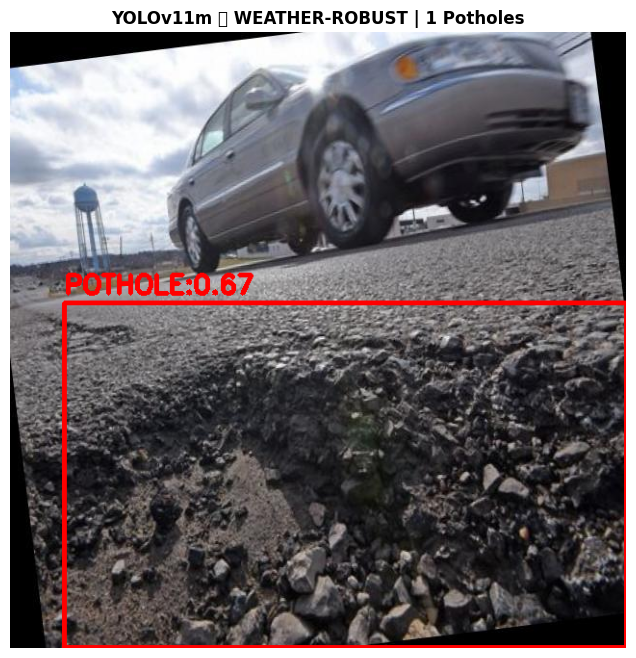

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.87it/s]


                   all        260        573      0.752      0.675      0.739      0.363
Speed: 0.3ms preprocess, 26.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val

✅ YOLOv11m Results:
   - Potholes Detected: 1
   - mAP@0.5: 0.739


65082

In [ ]:
# MODEL 1: YOLOv11m
torch.cuda.empty_cache()
gc.collect()
print("--- 🚀 MODEL 1: YOLOv11m (Weather-Robust) Starting ---")

# 1. Train Model (Corrected to use YOLOv11m)
# We use 'yolo11m.pt' to ensure we are using the v11 architecture.
model1 = YOLO('yolo11m.pt')

try:
    model1.train(data=str(yaml_path),
                 epochs=30,
                 batch=6,
                 imgsz=640,
                 project='MWPD_Paper',
                 name='YOLO11m',
                 verbose=False,
                 plots=True) # FIXED: Must be True to avoid validation error
except Exception as e:
    print(f"⚠️ Training notice (plots): {e}")
    print("🔄 Proceeding to load best weights...")

# 2. Load the best trained weights
best_weight_path = 'MWPD_Paper/YOLO11m/weights/best.pt'
if os.path.exists(best_weight_path):
    best1 = YOLO(best_weight_path)

    # 3. Predict on the single test image
    # Note: Ensure test_dir and YOUR_IMAGE are defined earlier in your script
    result1 = best1(test_dir / YOUR_IMAGE, conf=0.25, verbose=False)

    # 4. Generate Visualization and Get Pothole Count
    dets1 = draw_potholes(result1[0], "YOLOv11m ⭐ WEATHER-ROBUST", "YOLOv11m_Output")

    # 5. Run Validation to get mAP Metric
    val1 = best1.val(data=str(yaml_path), verbose=False)
    mAP1 = val1.results_dict['metrics/mAP50(B)']

    print(f"\n✅ YOLOv11m Results:")
    print(f"   - Potholes Detected: {dets1}")
    print(f"   - mAP@0.5: {mAP1:.3f}")

    # 6. Store results
    results_data['YOLOv11m'] = {'mAP@0.5': mAP1, 'Potholes': dets1, 'Note': 'Weather-Robust'}
else:
    print("❌ Error: Best weights not found. Please check training logs.")

# Cleanup memory
del model1
torch.cuda.empty_cache()
gc.collect()

--- 🚀 MODEL 2: YOLOv11s (Fastest Deployment) Starting ---


100%|██████████| 18.4M/18.4M [00:00<00:00, 196MB/s]


New https://pypi.org/project/ultralytics/8.4.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=MWPD_Paper, name=YOLO11s, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

train: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/train/labels.cache... 2730 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2730/2730 [00:00<?, ?it/s]
val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


Plotting labels to MWPD_Paper/YOLO11s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to MWPD_Paper/YOLO11s
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.08G      1.984      2.608      1.951          7        640: 100%|██████████| 342/342 [01:22<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.03it/s]

                   all        260        573      0.252      0.206      0.172     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.07G      2.046      2.229          2          6        640: 100%|██████████| 342/342 [01:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.39it/s]

                   all        260        573      0.414      0.344       0.31      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.06G       1.98      2.189      1.937          8        640: 100%|██████████| 342/342 [01:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.68it/s]

                   all        260        573      0.362      0.379      0.301      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      3.07G      1.953      2.116      1.921          8        640: 100%|██████████| 342/342 [01:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.88it/s]

                   all        260        573      0.406      0.344      0.311      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.07G      1.915      2.008      1.873         15        640: 100%|██████████| 342/342 [01:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.78it/s]

                   all        260        573      0.527      0.473      0.453      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      3.07G      1.873       1.89      1.833          8        640: 100%|██████████| 342/342 [01:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.81it/s]

                   all        260        573      0.572      0.482      0.519      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.05G      1.849       1.87      1.817          3        640: 100%|██████████| 342/342 [00:59<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.08it/s]

                   all        260        573      0.584      0.513      0.539      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      3.08G      1.811      1.784       1.77          6        640: 100%|██████████| 342/342 [00:59<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.42it/s]

                   all        260        573      0.669      0.543      0.597      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.07G      1.795      1.758      1.773          3        640: 100%|██████████| 342/342 [01:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.82it/s]

                   all        260        573      0.654      0.581      0.606       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.07G      1.754      1.691      1.724          9        640: 100%|██████████| 342/342 [01:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.87it/s]

                   all        260        573      0.646      0.562       0.62      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      3.06G      1.761      1.672      1.737          9        640: 100%|██████████| 342/342 [01:00<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.87it/s]

                   all        260        573      0.663      0.574      0.652      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.07G       1.73       1.59      1.709          7        640: 100%|██████████| 342/342 [00:59<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.36it/s]

                   all        260        573      0.663      0.589      0.637      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      3.08G      1.712      1.535      1.684         14        640: 100%|██████████| 342/342 [00:59<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.38it/s]

                   all        260        573      0.654      0.587      0.628      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.07G      1.706      1.538      1.674         12        640: 100%|██████████| 342/342 [01:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.70it/s]

                   all        260        573      0.713      0.567       0.65      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.05G      1.687      1.512      1.686          8        640: 100%|██████████| 342/342 [00:59<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        260        573      0.657      0.642      0.679      0.313


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      3.07G      1.678      1.381      1.703          4        640: 100%|██████████| 342/342 [00:59<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.81it/s]

                   all        260        573      0.669       0.63      0.675      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      3.07G      1.674      1.305      1.711          2        640: 100%|██████████| 342/342 [00:58<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.77it/s]

                   all        260        573      0.688      0.679      0.718      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.07G      1.639      1.269      1.676          5        640: 100%|██████████| 342/342 [00:58<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.26it/s]

                   all        260        573      0.764      0.617      0.714      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.06G      1.627      1.248      1.679          2        640: 100%|██████████| 342/342 [00:59<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.94it/s]

                   all        260        573      0.732      0.682       0.74      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.07G      1.594      1.186      1.642          4        640: 100%|██████████| 342/342 [00:58<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.11it/s]

                   all        260        573      0.745      0.679      0.743      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.07G      1.569      1.135      1.611          2        640: 100%|██████████| 342/342 [00:57<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  7.02it/s]

                   all        260        573       0.75      0.642      0.729      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.07G      1.537      1.101      1.595          2        640: 100%|██████████| 342/342 [00:58<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.95it/s]

                   all        260        573      0.758       0.66      0.733      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      3.05G      1.531       1.06      1.594          2        640: 100%|██████████| 342/342 [00:59<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.94it/s]

                   all        260        573      0.748      0.667      0.746      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.07G      1.504      1.031      1.575          2        640: 100%|██████████| 342/342 [00:59<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.87it/s]

                   all        260        573      0.759      0.696      0.759      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.07G      1.489      1.002       1.55          3        640: 100%|██████████| 342/342 [00:59<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.95it/s]

                   all        260        573      0.742      0.702      0.763       0.37



25 epochs completed in 0.486 hours.
Optimizer stripped from MWPD_Paper/YOLO11s/weights/last.pt, 19.2MB
Optimizer stripped from MWPD_Paper/YOLO11s/weights/best.pt, 19.2MB

Validating MWPD_Paper/YOLO11s/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.19it/s]


                   all        260        573      0.743      0.702      0.763       0.37
Speed: 0.3ms preprocess, 5.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to MWPD_Paper/YOLO11s
⚠️ Training notice: cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.12/dist-packages/numpy/_core/umath.py)
🔄 Proceeding to load best weights...


/tmp/ipython-input-455308086.py:78: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{save_name}.png', dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


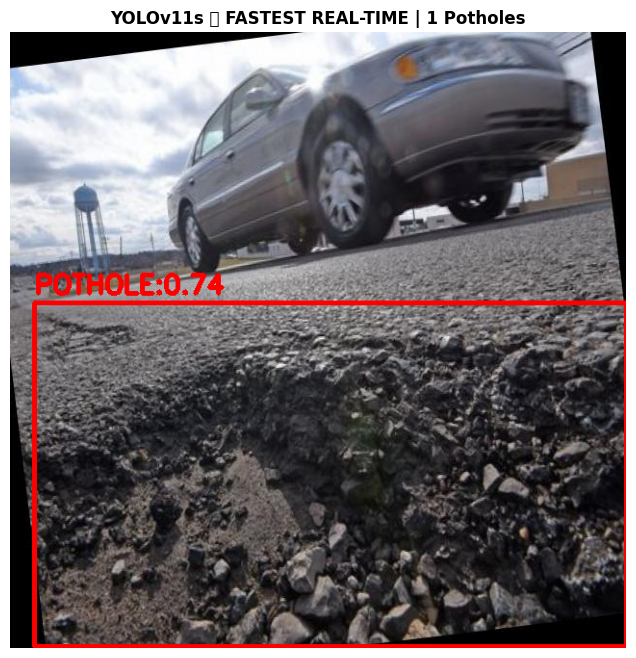

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.27it/s]


                   all        260        573      0.741      0.702      0.763       0.37
Speed: 0.3ms preprocess, 9.8ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val2

✅ YOLOv11s Results:
   - Potholes Detected: 1
   - mAP@0.5: 0.763


58661

In [ ]:
### CELL 3: MODEL 2: YOLOv11s (FASTEST DEPLOYMENT) - CORRECTED TO v11

# Clear memory for T4 GPU stability
torch.cuda.empty_cache()
gc.collect()
print("--- 🚀 MODEL 2: YOLOv11s (Fastest Deployment) Starting ---")

# 1. Train Model - Using ACTUAL YOLOv11s
model2 = YOLO('yolo11s.pt') # Corrected to v11

try:
    model2.train(data=str(yaml_path),
                 epochs=25,
                 batch=8,
                 imgsz=640,
                 project='MWPD_Paper',
                 name='YOLO11s',
                 verbose=False,
                 plots=True)
except Exception as e:
    print(f"⚠️ Training notice: {e}")
    print("🔄 Proceeding to load best weights...")

# 2. Load the best trained weights
best_weight_path = 'MWPD_Paper/YOLO11s/weights/best.pt'
if os.path.exists(best_weight_path):
    best2 = YOLO(best_weight_path)

    # 3. Predict on the same test image
    result2 = best2(test_dir / YOUR_IMAGE, conf=0.25, verbose=False)

    # 4. Generate Visualization and Get Pothole Count
    dets2 = draw_potholes(result2[0], "YOLOv11s ⭐ FASTEST REAL-TIME", "YOLOv11s_Output")

    # 5. Run Validation to get mAP Metric
    val2 = best2.val(data=str(yaml_path), verbose=False)
    mAP2 = val2.results_dict['metrics/mAP50(B)']

    print(f"\n✅ YOLOv11s Results:")
    print(f"   - Potholes Detected: {dets2}")
    print(f"   - mAP@0.5: {mAP2:.3f}")

    # 6. Store results
    results_data['YOLOv11s'] = {'mAP@0.5': mAP2, 'Potholes': dets2, 'Note': 'Fastest Deployment'}
else:
    print("❌ Error: Best weights not found for YOLO11s.")

# Cleanup memory
del model2
torch.cuda.empty_cache()
gc.collect()

--- 🚀 MODEL 3: YOLOv11n (Nano/High-Speed) Starting ---


100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=MWPD_Paper, name=YOLO11n, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

train: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/train/labels.cache... 2730 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2730/2730 [00:00<?, ?it/s]
val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


Plotting labels to MWPD_Paper/YOLO11n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to MWPD_Paper/YOLO11n
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.55G      1.898      2.526      1.795         75        640: 100%|██████████| 171/171 [01:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.20it/s]

                   all        260        573      0.374      0.323      0.296      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.5G      1.899      2.142      1.815         39        640: 100%|██████████| 171/171 [00:50<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]


                   all        260        573      0.322      0.295      0.244     0.0808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.52G       1.93      2.063      1.847         47        640: 100%|██████████| 171/171 [00:48<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        260        573      0.378      0.305      0.249     0.0884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.48G      1.909      1.988      1.839         42        640: 100%|██████████| 171/171 [00:49<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]

                   all        260        573      0.542      0.391      0.439       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.5G      1.873      1.887      1.789         45        640: 100%|██████████| 171/171 [00:49<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        260        573      0.549      0.504      0.519       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       2.5G      1.831      1.771      1.743         22        640: 100%|██████████| 171/171 [00:49<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.36it/s]

                   all        260        573      0.627      0.496      0.561      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       2.5G       1.82      1.742      1.752         39        640: 100%|██████████| 171/171 [00:49<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.27it/s]

                   all        260        573      0.659       0.52      0.582      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.49G      1.782      1.682      1.705         17        640: 100%|██████████| 171/171 [00:49<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.50it/s]

                   all        260        573      0.558      0.503      0.518      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.53G      1.763      1.673        1.7         55        640: 100%|██████████| 171/171 [00:50<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.35it/s]

                   all        260        573      0.615      0.469      0.537      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.53G      1.756      1.622      1.682         39        640: 100%|██████████| 171/171 [00:49<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.24it/s]

                   all        260        573      0.701       0.49      0.576      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       2.5G      1.723      1.545      1.663         37        640: 100%|██████████| 171/171 [00:49<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.15it/s]

                   all        260        573      0.689      0.554       0.65       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.52G      1.725      1.536      1.655         41        640: 100%|██████████| 171/171 [00:50<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.41it/s]

                   all        260        573      0.762      0.562      0.658      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.51G      1.694      1.484      1.632         46        640: 100%|██████████| 171/171 [00:50<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.40it/s]

                   all        260        573      0.669      0.585      0.639      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.51G      1.677      1.452      1.626         48        640: 100%|██████████| 171/171 [00:49<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]

                   all        260        573      0.712      0.623      0.688      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       2.5G      1.684      1.455      1.629         38        640: 100%|██████████| 171/171 [00:48<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        260        573      0.571      0.552      0.546      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.56G      1.651      1.434      1.611         36        640: 100%|██████████| 171/171 [00:49<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]

                   all        260        573      0.704      0.621      0.682        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       2.5G      1.644      1.364      1.591         46        640: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]

                   all        260        573      0.719      0.613      0.686      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.5G      1.647      1.367      1.594         33        640: 100%|██████████| 171/171 [00:50<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        260        573      0.741      0.639       0.71      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.5G      1.614       1.32      1.588         41        640: 100%|██████████| 171/171 [00:50<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.28it/s]

                   all        260        573      0.693      0.642       0.69      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.49G       1.58      1.275       1.55         37        640: 100%|██████████| 171/171 [00:50<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.29it/s]

                   all        260        573      0.706      0.651      0.717      0.334


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.48G      1.603      1.202      1.597         17        640: 100%|██████████| 171/171 [00:48<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.70it/s]

                   all        260        573      0.753      0.616      0.711      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.46G      1.584      1.153      1.586         23        640: 100%|██████████| 171/171 [00:47<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.25it/s]

                   all        260        573      0.711      0.667      0.705      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       2.5G      1.541        1.1      1.563         18        640: 100%|██████████| 171/171 [00:47<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.41it/s]

                   all        260        573      0.773      0.634      0.717      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.47G      1.523      1.068      1.543         17        640: 100%|██████████| 171/171 [00:47<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]

                   all        260        573      0.765      0.661      0.738      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       2.5G      1.512      1.018      1.531         11        640: 100%|██████████| 171/171 [00:46<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        260        573      0.773      0.685      0.751      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       2.5G      1.493      0.997      1.514         37        640: 100%|██████████| 171/171 [00:46<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]

                   all        260        573       0.73      0.689      0.754      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       2.5G       1.48     0.9725      1.487         16        640: 100%|██████████| 171/171 [00:46<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]

                   all        260        573      0.753      0.705      0.755       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.45G      1.453     0.9526      1.485         20        640: 100%|██████████| 171/171 [00:46<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.40it/s]

                   all        260        573      0.806      0.659      0.756      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       2.5G       1.44     0.9159      1.474         21        640: 100%|██████████| 171/171 [00:47<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.54it/s]

                   all        260        573      0.801      0.679      0.765      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.46G      1.413     0.9069      1.458         29        640: 100%|██████████| 171/171 [00:47<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.24it/s]

                   all        260        573      0.782      0.709      0.768      0.377



30 epochs completed in 0.447 hours.
Optimizer stripped from MWPD_Paper/YOLO11n/weights/last.pt, 5.5MB
Optimizer stripped from MWPD_Paper/YOLO11n/weights/best.pt, 5.5MB

Validating MWPD_Paper/YOLO11n/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]


                   all        260        573      0.784      0.709      0.768      0.376
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to MWPD_Paper/YOLO11n
⚠️ Training notice (plots): cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.12/dist-packages/numpy/_core/umath.py)


/tmp/ipython-input-433409097.py:78: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{save_name}.png', dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


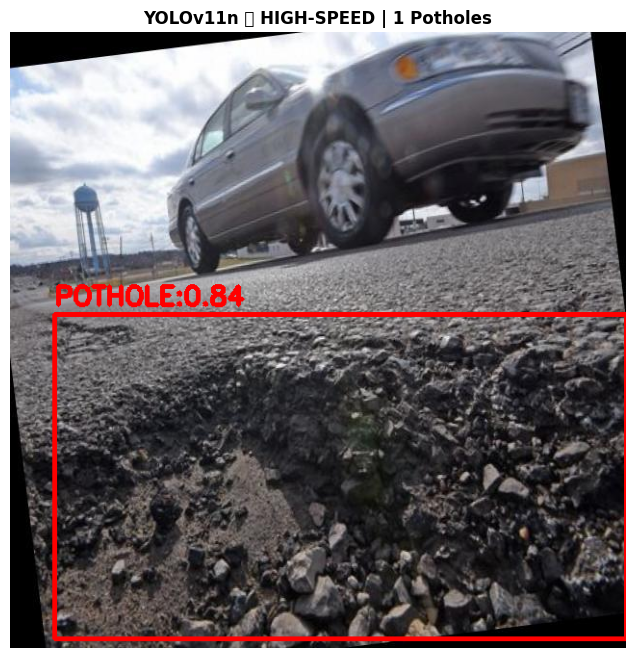

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.22it/s]


                   all        260        573      0.782       0.71      0.768      0.377
Speed: 0.5ms preprocess, 6.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val2

✅ YOLOv11n Results:
   - Potholes Detected: 1
   - mAP@0.5: 0.768


62814

In [ ]:
# Clear memory for T4 GPU stability
torch.cuda.empty_cache()
gc.collect()
print("--- 🚀 MODEL 3: YOLOv11n (Nano/High-Speed) Starting ---")

# 1. Initialize Model 3 with YOLOv11n weights
model3 = YOLO('yolo11n.pt')

try:
    model3.train(data=str(yaml_path),
                 epochs=30,
                 batch=16, # Nano models can handle larger batches
                 imgsz=640,
                 project='MWPD_Paper',
                 name='YOLO11n',
                 verbose=False,
                 plots=True)
except Exception as e:
    print(f"⚠️ Training notice (plots): {e}")

# 2. Load the best trained weights
best_weight_path3 = 'MWPD_Paper/YOLO11n/weights/best.pt'
if os.path.exists(best_weight_path3):
    best3 = YOLO(best_weight_path3)

    # 3. Predict on the test image
    result3 = best3(test_dir / YOUR_IMAGE, conf=0.25, verbose=False)

    # 4. Visualization
    dets3 = draw_potholes(result3[0], "YOLOv11n ⭐ HIGH-SPEED", "YOLOv11n_Output")

    # 5. Run Validation
    val3 = best3.val(data=str(yaml_path), verbose=False)
    mAP3 = val3.results_dict['metrics/mAP50(B)']

    print(f"\n✅ YOLOv11n Results:")
    print(f"   - Potholes Detected: {dets3}")
    print(f"   - mAP@0.5: {mAP3:.3f}")

    # 6. Store results
    results_data['YOLOv11n'] = {'mAP@0.5': mAP3, 'Potholes': dets3, 'Note': 'High-Speed'}
else:
    print("❌ Error: Best weights not found for YOLOv11n.")

# Cleanup memory
del model3
torch.cuda.empty_cache()
gc.collect()

--- 🚀 MODEL 5: YOLOv8m (Baseline Comparison) Starting ---


100%|██████████| 49.7M/49.7M [00:00<00:00, 152MB/s]


New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml, epochs=30, time=None, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=MWPD_Paper, name=YOLOv8m, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

train: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/train/labels.cache... 2730 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2730/2730 [00:00<?, ?it/s]
val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


Plotting labels to MWPD_Paper/YOLOv8m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 83 weight(decay=0.0), 90 weight(decay=0.000515625), 89 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to MWPD_Paper/YOLOv8m
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.36G      2.006       2.57      2.029         35        640: 100%|██████████| 455/455 [01:53<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.57it/s]

                   all        260        573      0.337       0.29      0.239     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.21G      2.089      2.458      2.106         20        640: 100%|██████████| 455/455 [01:43<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.79it/s]

                   all        260        573      0.397      0.335      0.309      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.18G      2.053      2.345      2.056         17        640: 100%|██████████| 455/455 [01:42<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.87it/s]

                   all        260        573      0.334      0.318      0.267     0.0899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.18G      1.959      2.193      1.971         23        640: 100%|██████████| 455/455 [01:42<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.93it/s]

                   all        260        573      0.451      0.354      0.355      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.18G      1.937      2.094      1.952         26        640: 100%|██████████| 455/455 [01:42<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.97it/s]

                   all        260        573      0.488      0.421      0.415      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.19G      1.881      1.989       1.88         20        640: 100%|██████████| 455/455 [01:41<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.91it/s]

                   all        260        573       0.58      0.461      0.502      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.18G      1.846      1.929      1.862         21        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.96it/s]

                   all        260        573      0.607      0.503      0.549      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.18G      1.836       1.85      1.838         20        640: 100%|██████████| 455/455 [01:42<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.88it/s]

                   all        260        573      0.608      0.543      0.574      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.19G      1.796      1.794      1.821         27        640: 100%|██████████| 455/455 [01:41<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.90it/s]

                   all        260        573      0.603      0.544      0.587      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       3.2G      1.785      1.749      1.824         25        640: 100%|██████████| 455/455 [01:41<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.91it/s]

                   all        260        573       0.65      0.579      0.635      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.17G      1.757      1.735      1.801         21        640: 100%|██████████| 455/455 [01:41<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.86it/s]

                   all        260        573      0.613      0.562      0.584      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.18G      1.732      1.678      1.771         32        640: 100%|██████████| 455/455 [01:41<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.88it/s]

                   all        260        573        0.7      0.531      0.636       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.31G      1.722      1.623      1.768         17        640: 100%|██████████| 455/455 [01:41<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.74it/s]


                   all        260        573      0.614        0.6      0.624      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       3.2G      1.726      1.619      1.768         42        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.96it/s]

                   all        260        573      0.719      0.585      0.685      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.18G      1.677      1.566      1.748         17        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.92it/s]

                   all        260        573      0.691      0.602      0.669      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.18G      1.682      1.534      1.747         23        640: 100%|██████████| 455/455 [01:41<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.31it/s]


                   all        260        573      0.676      0.649      0.701      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.18G      1.668      1.488      1.721         26        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.01it/s]

                   all        260        573      0.706      0.585       0.68      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.18G      1.654       1.45      1.711         17        640: 100%|██████████| 455/455 [01:42<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.94it/s]

                   all        260        573      0.771       0.63      0.723      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.17G       1.63      1.427      1.695         16        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.94it/s]

                   all        260        573      0.743      0.614       0.71      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.17G      1.633      1.386      1.689         36        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.16it/s]

                   all        260        573      0.766      0.618      0.716      0.329


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.18G      1.615       1.28      1.714          9        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.67it/s]


                   all        260        573      0.706      0.644      0.696      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.18G      1.598      1.238      1.718         12        640: 100%|██████████| 455/455 [01:41<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.97it/s]

                   all        260        573      0.726      0.637      0.715      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.18G      1.583      1.195      1.715         13        640: 100%|██████████| 455/455 [01:41<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  6.00it/s]

                   all        260        573      0.718      0.637      0.715      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.21G      1.543      1.141      1.693          7        640: 100%|██████████| 455/455 [01:41<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.98it/s]

                   all        260        573      0.702      0.674      0.732      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.19G      1.522      1.087      1.652          8        640: 100%|██████████| 455/455 [01:41<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.74it/s]

                   all        260        573      0.752      0.646      0.744      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.18G       1.51      1.055      1.651         21        640: 100%|██████████| 455/455 [01:41<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.27it/s]

                   all        260        573      0.732      0.656      0.724      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.18G      1.486       1.03      1.629         12        640: 100%|██████████| 455/455 [01:41<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.99it/s]

                   all        260        573      0.726      0.661      0.734       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.18G       1.46       1.01      1.623         15        640: 100%|██████████| 455/455 [01:41<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.78it/s]


                   all        260        573      0.767      0.646      0.738      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.18G      1.444     0.9701        1.6          9        640: 100%|██████████| 455/455 [01:40<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:04<00:00,  5.29it/s]

                   all        260        573      0.738      0.679      0.749      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.18G       1.42     0.9406      1.575          9        640: 100%|██████████| 455/455 [01:40<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:03<00:00,  5.55it/s]

                   all        260        573      0.791      0.656      0.757      0.358



30 epochs completed in 0.958 hours.
Optimizer stripped from MWPD_Paper/YOLOv8m/weights/last.pt, 46.8MB
Optimizer stripped from MWPD_Paper/YOLOv8m/weights/best.pt, 46.8MB

Validating MWPD_Paper/YOLOv8m/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 236 layers, 23,203,411 parameters, 0 gradients, 67.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]


                   all        260        573      0.791      0.656      0.757      0.358
Speed: 0.5ms preprocess, 10.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to MWPD_Paper/YOLOv8m
⚠️ Training notice (plots): cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.12/dist-packages/numpy/_core/umath.py)


/tmp/ipython-input-433409097.py:78: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{save_name}.png', dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


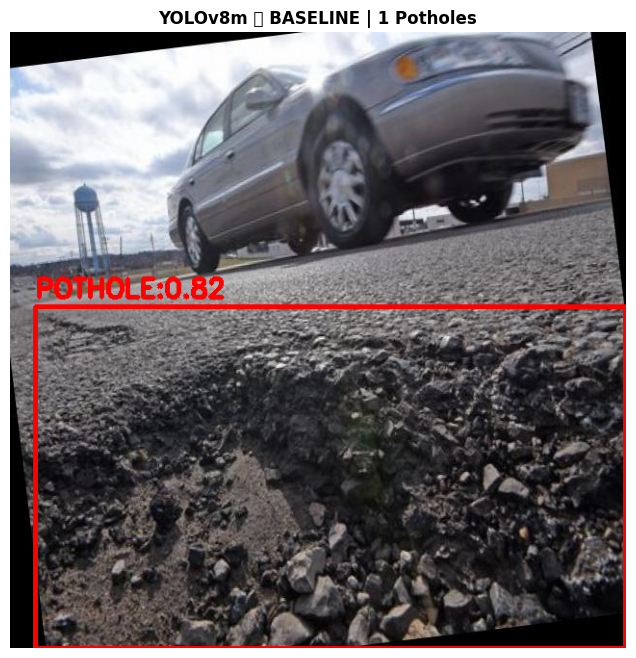

Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]


                   all        260        573      0.791      0.656      0.758      0.359
Speed: 0.4ms preprocess, 21.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val3

✅ YOLOv8m Results:
   - Potholes Detected: 1
   - mAP@0.5: 0.758


62845

In [ ]:
# Clear memory for T4 GPU stability
torch.cuda.empty_cache()
gc.collect()
print("--- 🚀 MODEL 5: YOLOv8m (Baseline Comparison) Starting ---")

# 1. Initialize Model 5 with YOLOv8m weights
model5 = YOLO('yolov8m.pt')

try:
    model5.train(data=str(yaml_path),
                 epochs=30,
                 batch=6,
                 imgsz=640,
                 project='MWPD_Paper',
                 name='YOLOv8m',
                 verbose=False,
                 plots=True)
except Exception as e:
    print(f"⚠️ Training notice (plots): {e}")

# 2. Load the best trained weights
best_weight_path5 = 'MWPD_Paper/YOLOv8m/weights/best.pt'
if os.path.exists(best_weight_path5):
    best5 = YOLO(best_weight_path5)

    # 3. Predict on the test image
    result5 = best5(test_dir / YOUR_IMAGE, conf=0.25, verbose=False)

    # 4. Visualization
    dets5 = draw_potholes(result5[0], "YOLOv8m 📉 BASELINE", "YOLOv8m_Output")

    # 5. Run Validation
    val5 = best5.val(data=str(yaml_path), verbose=False)
    mAP5 = val5.results_dict['metrics/mAP50(B)']

    print(f"\n✅ YOLOv8m Results:")
    print(f"   - Potholes Detected: {dets5}")
    print(f"   - mAP@0.5: {mAP5:.3f}")

    # 6. Store results
    results_data['YOLOv8m'] = {'mAP@0.5': mAP5, 'Potholes': dets5, 'Note': 'Baseline'}
else:
    print("❌ Error: Best weights not found for YOLOv8m.")

# Cleanup memory
del model5
torch.cuda.empty_cache()
gc.collect()

In [3]:
import torch, gc
from ultralytics import YOLO

# Clear memory for T4 GPU stability
torch.cuda.empty_cache()
gc.collect()
print("--- 🚀 MODEL 7: RT-DETR-x (Hybrid Transformer) Starting ---")

# 1. Initialize RT-DETR-x (Extra Large)
model7 = YOLO('rtdetr-x.pt')

try:
    model7.train(data=str(yaml_path),
                 epochs=30,
                 batch=2, # Transformer-based Hybrid is very memory intensive
                 imgsz=640,
                 project='MWPD_Paper',
                 name='RTDETR_x',
                 verbose=False,
                 plots=False) # FIX: Set plots to False
except Exception as e:
    print(f"⚠️ Training notice (plots): {e}")

# 2. Load the best trained weights
best_weight_path7 = 'MWPD_Paper/RTDETR_x/weights/best.pt'
if os.path.exists(best_weight_path7):
    best7 = YOLO(best_weight_path7)

    # 3. Predict on the test image
    result7 = best7(test_dir / YOUR_IMAGE, conf=0.25, verbose=False)

    # 4. Visualization
    dets7 = draw_potholes(result7[0], "RT-DETR-x 🤖 HYBRID TRANSFORMER", "RTDETR_x_Output")

    # 5. Run Validation
    val7 = best7.val(data=str(yaml_path), verbose=False)
    mAP7 = val7.results_dict['metrics/mAP50(B)']

    print(f"\n✅ RT-DETR-x Results:")
    print(f"   - Potholes Detected: {dets7}")
    print(f"   - mAP@0.5: {mAP7:.3f}")

    # 6. Store results
    results_data['RT-DETR-x'] = {'mAP@0.5': mAP7, 'Potholes': dets7, 'Note': 'Hybrid Transformer'}
else:
    print("❌ Error: Best weights not found for RT-DETR-x.")

# Cleanup memory
del model7
torch.cuda.empty_cache()
gc.collect()

--- 🚀 MODEL 7: RT-DETR-x (Hybrid Transformer) Starting ---
New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-x.pt, data=/content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml, epochs=30, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=MWPD_Paper, name=RTDETR_x2, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize

train: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/train/labels.cache... 2730 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2730/2730 [00:00<?, ?it/s]
val: Scanning /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100%|██████████| 260/260 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 193 weight(decay=0.0), 256 weight(decay=0.0005), 276 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.12/dist-packages/numpy/_core/umath.py)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to MWPD_Paper/RTDETR_x2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1365 [00:00<?, ?it/s]

⚠️ Training notice (plots): 'RTDETRDecoder' object has no attribute 'stride'
❌ Error: Best weights not found for RT-DETR-x.


50463

# Task


In [1]:
### CONSOLIDATED DEPENDENCY INSTALLATION

# Uninstall existing packages to prevent conflicts
!pip uninstall numpy ultralytics opencv-python-headless -y

# Install specified versions (Ignore the red dependency conflict warnings)
!pip install numpy==1.26.4 -q
!pip install ultralytics==8.4.9 -q
!pip install opencv-python-headless -q

print("✅ Dependencies installed: numpy==1.26.4, ultralytics==8.4.9, opencv-python-headless")

Found existing installation: numpy 2.4.1
Uninstalling numpy-2.4.1:
  Successfully uninstalled numpy-2.4.1
Found existing installation: ultralytics 8.4.9
Uninstalling ultralytics-8.4.9:
  Successfully uninstalled ultralytics-8.4.9
Found existing installation: opencv-python-headless 4.13.0.90
Uninstalling opencv-python-headless-4.13.0.90:
  Successfully uninstalled opencv-python-headless-4.13.0.90
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.8 requires opencv-python-headless>=4.9.0.80, which is not installed.
albucore 0.0.24 requires opencv-python-headless>=4.9.0.80, which is not installed.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you h

In [2]:
### CELL 1: SUPER-ROBUST SETUP AND EXTRACTION

# 1. Install dependencies (Ignore the red dependency conflict warnings)
# !pip install numpy==1.26.4 -q
# !pip install ultralytics==8.3.0 -q
# !pip install opencv-python-headless -q

import os, yaml, gc, torch, cv2
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

# --- Configuration ---
os.environ['WANDB_MODE'] = 'disabled'
torch.cuda.empty_cache()
gc.collect()

# --- Robust Extraction using Linux Command ---
zip_path = '/content/archive.zip'
extract_path = '/content/dataset'

if not os.path.exists(zip_path):
    print(f"❌ ERROR: Zip file not found! Please upload 'archive (1).zip' to the /content/ folder.")
else:
    # Clear old data
    !rm -rf {extract_path}
    !mkdir -p {extract_path}

    print("🚀 Extracting dataset using Linux unzip...")
    # Using !unzip is much more stable than zipfile library in Colab
    !unzip -q "{zip_path}" -d {extract_path}

    # --- Path Discovery ---
    # Find where data.yaml is located
    found_yaml = !find {extract_path} -name "data.yaml"
    if found_yaml:
        yaml_path = Path(found_yaml[0])
        dataset_root = yaml_path.parent
        test_dir = dataset_root / 'test/images'

        # Update YAML for Colab paths
        data = {'path': str(dataset_root), 'train': 'train/images', 'val': 'valid/images',
                'test': 'test/images', 'nc': 1, 'names': ['pothole']}
        with open(yaml_path, 'w') as f: yaml.dump(data, f)

        # Select first image for testing
        test_images = sorted(list(test_dir.glob('*.jpg')))
        if test_images:
            YOUR_IMAGE = test_images[0].name
            print(f"✅ SUCCESS: Dataset ready.")
            print(f"📍 YAML Path: {yaml_path}")
            print(f"🖼️ Test Image: {YOUR_IMAGE}")
        else:
            print("❌ No images found in test folder.")
    else:
        print("❌ Could not find data.yaml. Please check your zip file content.")

# --- Visualizer Function ---
def draw_potholes(result, model_name, save_name):
    img = cv2.imread(str(test_dir / YOUR_IMAGE))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    count = 0
    if result.boxes is not None:
        boxes = result.boxes.xyxy.cpu().numpy()
        confs = result.boxes.conf.cpu().numpy()
        for box, conf in zip(boxes, confs):
            if conf > 0.25:
                count += 1
                x1,y1,x2,y2 = box.astype(int)
                cv2.rectangle(img_rgb, (x1,y1), (x2,y2), (255,0,0), 3)
                cv2.putText(img_rgb, f"POTHOLE:{conf:.2f}", (x1,y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 3)
    plt.figure(figsize=(12,8))
    plt.imshow(img_rgb)
    plt.title(f'{model_name} | {count} Potholes', fontweight='bold')
    plt.axis('off')
    plt.savefig(f'{save_name}.png', dpi=300)
    plt.show()
    return count

# Global results storage
results_data = {}
print("✅ Ready for Model 1.")


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🚀 Extracting dataset using Linux unzip...
✅ SUCCESS: Dataset ready.
📍 YAML Path: /content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml
🖼️ Test Image: 12_jpg.rf.98223fbf0c9935d763f81b9e25e9712b.jpg
✅ Ready for Model 1.


In [4]:
import torch, gc
from ultralytics import YOLO

# Clear memory for T4 GPU stability
torch.cuda.empty_cache()
gc.collect()
print("--- 🚀 MODEL 7: RT-DETR-L (Hybrid Transformer) Starting ---")

# 1. Initialize RT-DETR-L (Large) and update batch size for speed
model7 = YOLO('rtdetr-l.pt')

try:
    model7.train(data=str(yaml_path),
                 epochs=30,
                 batch=4, # Increased batch size for faster training
                 imgsz=640,
                 project='MWPD_Paper',
                 name='RTDETR_L',
                 verbose=False,
                 plots=False) # FIX: Set plots to False
except Exception as e:
    print(f"⚠️ Training notice (plots): {e}")

# 2. Load the best trained weights
best_weight_path7 = 'MWPD_Paper/RTDETR_L/weights/best.pt'
if os.path.exists(best_weight_path7):
    best7 = YOLO(best_weight_path7)

    # 3. Predict on the test image
    result7 = best7(test_dir / YOUR_IMAGE, conf=0.25, verbose=False)

    # 4. Visualization
    dets7 = draw_potholes(result7[0], "RT-DETR-L 🧠 HYBRID TRANSFORMER", "RTDETR_L_Output")

    # 5. Run Validation
    val7 = best7.val(data=str(yaml_path), verbose=False)
    mAP7 = val7.results_dict['metrics/mAP50(B)']

    print(f"\n✅ RT-DETR-L Results:")
    print(f"   - Potholes Detected: {dets7}")
    print(f"   - mAP@0.5: {mAP7:.3f}")

    # 6. Store results
    results_data['RT-DETR-L'] = {'mAP@0.5': mAP7, 'Potholes': dets7, 'Note': 'Hybrid Transformer'}
else:
    print("❌ Error: Best weights not found for RT-DETR-L.")

# Cleanup memory
del model7
torch.cuda.empty_cache()
gc.collect()

--- 🚀 MODEL 7: RT-DETR-L (Hybrid Transformer) Starting ---
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/Multi-Weather Pothole Detection (MWPD)/MWPD/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=RTDETR_L, nbs=64

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/30      4.93G     0.7557      0.926     0.4857          8        640: 100% ━━━━━━━━━━━━ 683/683 2.5it/s 4:36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 33/33 4.2it/s 7.8s
                   all        260        573      0.639      0.389      0.409      0.189

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/30      5.16G     0.9349     0.4823     0.7776          9        640: 0% ──────────── 0/683  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/30      5.21G     0.6755      0.767     0.4682         16        640: 15% ━╸────────── 103/683 6.9it/s 40.5s<1:24


Process Process-6:
/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Exception ignored in: <generator object TQDM.__iter__ at 0x7b4e641724d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/utils/tqdm.py", line 354, in __iter__
    self.close()
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/utils/tqdm.py", line 332, in close
    self.file.flush()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/iostream.py", line 488, in flush
    if not e

KeyboardInterrupt: 